# Assignment 1:
Make sure you run your code before saving and submitting so that the output can be easily checked. Sometimes you might need to include chunks of code or a copy of your data set. Just make sure it runs (you can make sure that it runs by pressing the 'run all' command)

## Week 1
> `Exercise 1.3`
> 
> 1. Write a function called `count_danish_chars` that takes a string (city name) and returns the count of Danish special characters (æ, ø, å) or their representations (ae, oe, aa). Feel free to use [regular expressions](https://www.w3schools.com/python/python_regex.asp) if you know how.
> 2. Use the `.map()` function to apply `count_danish_chars` to the index of the DataFrame. Assign the result to a new column called `danishness`.
> 3. Which city has the highest `danishness` score? What is the fraction of Danish cities that don't have any Danish Characters or representations? What is the distribution of `danishness`?

In [2]:
# week1 exercise 1.3
import pandas as pd
import numpy as np

df = pd.read_csv('danish_cities.csv', index_col=0)


# question 1
def count_danish_chars(city_name):
    count = 0
    danish_chars = ['æ', 'ø', 'å']
    representations = ['ae', 'oe', 'aa']
    
    # Count Danish special characters
    for char in danish_chars:
        count += city_name.lower().count(char)
    
    # Count representations of Danish special characters
    for rep in representations:
        count += city_name.lower().count(rep)
    
    return count


# question 2
# Use .map() to apply the count_danish_chars function to the index (city names)
df['Danishness'] = df.index.map(count_danish_chars)


# question 3
# Find the city with the highest Danishness score
highest_danishness_city = df['Danishness'].idxmax()
highest_danishness_score = df['Danishness'].max()

# Calculate the fraction of cities without any Danish characters or representations
no_danish_chars_fraction = (df['Danishness'] == 0).mean()

# Calculate the distribution of Danishness
danishness_distribution = df['Danishness'].value_counts().sort_index()

# Output the results
print(f"The city with the highest 'Danishness' score is: {highest_danishness_city} with a score of {highest_danishness_score}")
print(f"The fraction of Danish cities without any Danish characters or representations is: {no_danish_chars_fraction:.2f}")
print("Distribution of Danishness:")
print(danishness_distribution)

The city with the highest 'Danishness' score is: Ærøskøbing with a score of 3
The fraction of Danish cities without any Danish characters or representations is: 0.61
Distribution of Danishness:
Danishness
0    105
1     60
2      6
3      1
Name: count, dtype: int64


> `Exercise 1.5`
> 1. Using your `df` DataFrame from exercise 1.3 group the cities by the `admin_name` attribute and list the both total population for each administrative area and their percentage of the total population in Denmark (you can find on Google). Which administrative area has the most cities?
> 2. Determine the city with the largest population in each administrative area as well as the average latitude (`lat`) and longitude (`lng`) for the cities in each area. Does the centerpoint for each area hit water, forest, field or city on Google Maps? Simply write the latitude and longitude into the search bar. Example using Copenhagen (55.6761, 12.5683) in Google Maps [here](https://www.google.com/maps/place/55°40'34.0%22N+12°34'05.9%22E/@55.676103,12.5657251,17z/data=!3m1!4b1!4m4!3m3!8m2!3d55.6761!4d12.5683?entry=ttu).
> 3. Using the combined data set `df_dropped`, make a new column `density` based on `area_km2` and `population`. Group the cities by `admin_name` and compare the density statistics (using aggregation functions) across different `admin_name` statuses to determine if there's a noticeable difference in density between regions. What are the 3 most dense cities in each region?
> 4. Which administrative area has the most diversity in terms of area_km2, population, density? Which area is the most Danish, based on `danishness`?

In [3]:
# CODE FROM WEEK 1 EXERCISE 1.4

df_areas = pd.read_csv('danish_areas.csv', index_col='Municipality')

print(df_areas.head())
print(df_areas.info())

# Reset index to use 'City' as a column for merging
df_reset = df.reset_index().rename(columns={'index': 'city'})
df_areas_reset = df_areas.reset_index().rename(columns={'Municipality': 'city'})

# Merge df_reset with df_areas_reset on 'city'
df_combined = pd.merge(df_reset, df_areas_reset, on='city', how='left')

# Set 'city' column as index again
df_combined.set_index('city', inplace=True)

# Check the resulting DataFrame
print(df_combined.head())
print(df_combined.info())

# Check for missing values in 'area_km2'
missing_data = df_combined[df_combined['area_km2'].isna()]

# Number of missing entries
num_missing = missing_data.shape[0]

# List of missing cities
missing_cities = missing_data.index.tolist()

print(f"Number of cities missing 'area_km2': {num_missing}")
print("Cities missing 'area_km2':")
print(missing_cities)

# Drop rows with any missing values
df_dropped = df_combined.dropna()

# Check the resulting DataFrame
print(df_dropped.head())
print(f"Number of rows after dropping missing values: {df_dropped.shape[0]}")

              area_km2  population_2012
Municipality                           
Copenhagen        86.6           549050
Aarhus           467.8           314545
Aalborg         1137.2           201142
Odense           305.7           191610
Esbjerg          794.7           115112
<class 'pandas.core.frame.DataFrame'>
Index: 98 entries, Copenhagen to Læsø
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_km2         98 non-null     float64
 1   population_2012  98 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 2.3+ KB
None
                lat      lng   admin_name  population  Danishness  area_km2  \
city                                                                          
Copenhagen  55.6761  12.5683  Hovedstaden   1366301.0           0      86.6   
Aarhus      56.1572  10.2107  Midtjylland    285273.0           1     467.8   
Odense      55.3958  10.3886   Syddanmark    180863.0   

In [4]:
#week 1 exercise 1.5

import pandas as pd

# Sample total population of Denmark (you should replace this with the actual value found from Google)
total_population_denmark = 5800000

# Group by 'admin_name' and calculate total population and percentage
population_by_area = df.groupby('admin_name')['population'].sum()
population_percentage = (population_by_area / total_population_denmark) * 100

# Find the administrative area with the most cities
cities_count = df.groupby('admin_name').size()
most_cities_area = cities_count.idxmax()

print("Total population by administrative area:")
print(population_by_area)
print("\nPercentage of total population in Denmark:")
print(population_percentage)
print(f"\nAdministrative area with the most cities: {most_cities_area}")

# Find the largest city by population for each 'admin_name'
largest_city = df.loc[df.groupby('admin_name')['population'].idxmax()]

# Calculate average latitude and longitude
avg_lat_lng = df.groupby('admin_name')[['lat', 'lng']].mean()

# Print largest city and average lat/lng
print("Largest city by population in each administrative area:")
print(largest_city[['population']])
print("\nAverage latitude and longitude for each administrative area:")
print(avg_lat_lng)

# Create a 'density' column
df_dropped.loc[:, 'density'] = df_dropped['population'] / df_dropped['area_km2']

# Group by 'admin_name' and calculate density statistics
density_stats = df_dropped.groupby('admin_name')['density'].agg(['mean', 'median', 'std'])


# Find the top 3 most dense cities in each administrative area
top_dense_cities = df_dropped.sort_values('density', ascending=False).groupby('admin_name').head(3)

print("Density statistics by administrative area:")
print(density_stats)
print("\nTop 3 most dense cities in each administrative area:")
print(top_dense_cities[['density']])

# Calculate diversity measures
area_diversity = df_dropped.groupby('admin_name')['area_km2'].std()
population_diversity = df_dropped.groupby('admin_name')['population'].std()
density_diversity = df_dropped.groupby('admin_name')['density'].std()

# Combine diversity measures into a DataFrame
diversity_df = pd.DataFrame({
    'area_diversity': area_diversity,
    'population_diversity': population_diversity,
    'density_diversity': density_diversity
})

# Find the administrative area with the most diversity
most_diverse_area = diversity_df.idxmax()

# Calculate average Danishness
avg_danishness = df.groupby('admin_name')['Danishness'].mean()
most_danish_area = avg_danishness.idxmax()

print("Diversity in terms of area, population, and density by administrative area:")
print(diversity_df)
print(f"\nAdministrative area with the most diversity: {most_diverse_area}")

print(f"\nMost Danish administrative area: {most_danish_area}")

Total population by administrative area:
admin_name
Hovedstaden    1759215.0
Midtjylland     842787.0
Nordjylland     341721.0
Sjælland        426601.0
Syddanmark      681627.0
Name: population, dtype: float64

Percentage of total population in Denmark:
admin_name
Hovedstaden    30.331293
Midtjylland    14.530810
Nordjylland     5.891741
Sjælland        7.355190
Syddanmark     11.752190
Name: population, dtype: float64

Administrative area with the most cities: Hovedstaden
Largest city by population in each administrative area:
            population
city                  
Copenhagen   1366301.0
Aarhus        285273.0
Aalborg       143598.0
Roskilde       51916.0
Odense        180863.0

Average latitude and longitude for each administrative area:
                   lat        lng
admin_name                       
Hovedstaden  55.767064  12.508174
Midtjylland  56.186495   9.714026
Nordjylland  57.065741   9.874800
Sjælland     55.410248  11.778233
Syddanmark   55.324542   9.812500
Densi

/var/folders/g0/b08_wvfd31d_tlq6bqgh55x80000gn/T/ipykernel_73202/682463538.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped.loc[:, 'density'] = df_dropped['population'] / df_dropped['area_km2']


## Week 2

> `Exercise 2.1`:
>
> 2. Group the combined DataFrame `df_decades` by the Decade column and call the resulting DataFrame `df_decades_grouped`. For each decade, identify and display the artist with the highest commercial success based on the provided `CSPC` metric. **Hint:** if you get stuck you can use the `idxmax()` function.
> 3. Use the `.bar()` from `matplotlib.pyplot` to create a barplot that displays the number of sales for each decade. Remember to include a suitable title and label the axes. **Extra Credit**: Overlay the bar chart with a horizontal line representing the percentage of sales attributable to the top five best-selling artists of each decade. You should plot the percentage above the line as text. What insights can you derive from this value?


    decade           artist      sales
29   1960s          Beatles  390857000
73   1970s       Pink Floyd  174538000
118  1980s  Michael Jackson  184775000
146  1990s      Celine Dion  162565000
252  2000s           Eminem  138676000
301  2010s     Taylor Swift  113696000
332  2020s        Bad Bunny   46027000


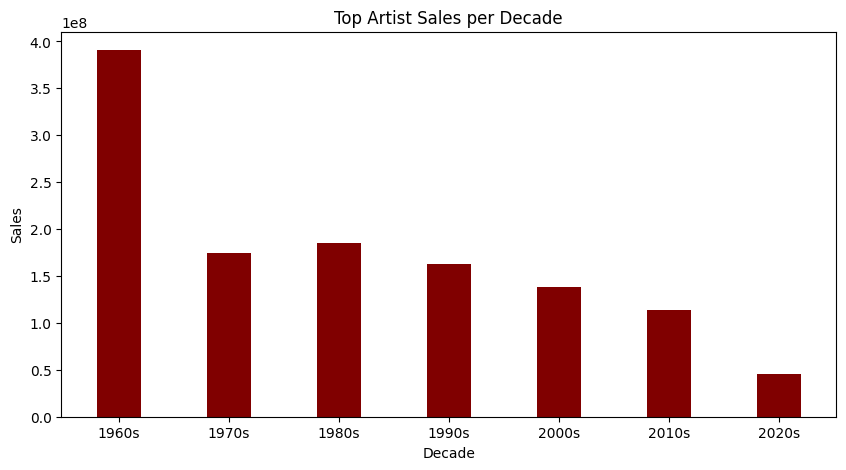

In [5]:
# week2 exercise 2.1
import pandas as pd
import matplotlib.pyplot as plt

# File paths
files = [
    'week2/data_cspc/data60s.csv',
    'week2/data_cspc/data70s.csv',
    'week2/data_cspc/data80s.csv',
    'week2/data_cspc/data90s.csv',
    'week2/data_cspc/data00s.csv',
    'week2/data_cspc/data10s.csv',
    'week2/data_cspc/data20s.csv'
]

# Read and concatenate the CSV files
dfs = [pd.read_csv(file) for file in files]

# Add a 'decade' column
decades = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
for df, decade in zip(dfs, decades):
    df['decade'] = decade

# Combine all DataFrames into one
df_decades = pd.concat(dfs, ignore_index=True)

# Group by decade and find the artist with the highest sales
df_decades_grouped = df_decades.groupby('decade')
idx = df_decades_grouped['sales'].idxmax()
top_artists = df_decades.loc[idx]
print(top_artists[['decade', 'artist', 'sales']])


# Plotting
fig = plt.figure(figsize=(10, 5))

# Extract data for plotting
decades = top_artists['decade']
sales = top_artists['sales']

# Create the bar plot
plt.bar(decades, sales, color='maroon', width=0.4)

plt.xlabel("Decade")
plt.ylabel("Sales")
plt.title("Top Artist Sales per Decade")
plt.show()

> `Exercise 2.4`: 
>
> 2. There are some instances where the `name` of the artist is not the same as the index. Are there any instances where we get the wrong artist from `search_for_artist`? Print both the meta data `name` and the `index` where they are different. Are all the difference due to spelling, or do some of them get the wrong artist? For each wrong artist, fix the metadata. Finally, drop the new `name` column.
> 3. Use the `.scatter()` from `matplotlib.pyplot` to show the relationship between `popularity` and `followers`. Do you notice a trend? Try log-transforming `followers` using `numpy`. Now try plotting the data again using the log-transformed `log_followers`. How do you interpret the relationship? You can use `.corr()` to get the pearson correlation between variables in a DataFrame.

In [6]:
# week2 exercise 2.4
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Ensure tqdm is used with pandas
tqdm.pandas()

# Debug: Check the format of unique_artists
print(unique_artists[:10])

# If unique_artists contains tuples, extract just the artist names
unique_artists = [artist[2] if isinstance(artist, tuple) else artist for artist in unique_artists]

# Create DataFrame with artist names as index
df_artists = pd.DataFrame(index=unique_artists)

# Map the search_for_artist function to each artist in unique_artists
df_artists['meta_data_artists'] = df_artists.index.map(lambda artist: search_for_artist(token, artist))

# Extract features and add them as new columns
df_artists['name'] = df_artists['meta_data_artists'].apply(lambda data: get_artist_data_feature(data, 'name'))
df_artists['id'] = df_artists['meta_data_artists'].apply(lambda data: get_artist_data_feature(data, 'id'))
df_artists['genres'] = df_artists['meta_data_artists'].apply(lambda data: get_artist_data_feature(data, 'genres'))
df_artists['followers'] = df_artists['meta_data_artists'].apply(lambda data: get_artist_data_feature(data, 'followers'))
df_artists['popularity'] = df_artists['meta_data_artists'].apply(lambda data: get_artist_data_feature(data, 'popularity'))

# Find mismatches between the index and the name column
mismatches = df_artists[df_artists.index != df_artists['name']]

# Iterate over mismatches where index and metadata name are different
for index, row in mismatches.iterrows():
    # Correct artist name (assuming the index is correct)
    correct_artist_name = index
    print(f"Fixing artist: {row['name']} (Incorrect) -> {correct_artist_name} (Correct)")
    
    # Perform search again using the correct artist name
    corrected_metadata = search_for_artist(token, correct_artist_name)
    
    # Update the metadata with the correct artist data
    df_artists.at[index, 'meta_data_artists'] = corrected_metadata

# Drop the 'name' column after corrections
df_artists.drop('name', axis=1, inplace=True)

# Proceed with plotting and correlation analysis
plt.scatter(df_artists['followers'], df_artists['popularity'])
plt.xlabel('Followers')
plt.ylabel('Popularity')
plt.title('Popularity vs. Followers')
plt.show()

# Log-transform the followers
df_artists['log_followers'] = np.log(df_artists['followers'] + 1)  # Adding 1 to avoid log(0)

# Plot log-followers vs. popularity
plt.scatter(df_artists['log_followers'], df_artists['popularity'])
plt.xlabel('Log Followers')
plt.ylabel('Popularity')
plt.title('Popularity vs. Log Followers')
plt.show()

# Pearson correlation between followers and popularity
correlation = df_artists[['followers', 'popularity']].corr()
print(correlation)

# Pearson correlation between log-followers and popularity
log_correlation = df_artists[['log_followers', 'popularity']].corr()
print(log_correlation)


NameError: name 'unique_artists' is not defined

> `Exercise 2.5`:
> **OBS! No need to run this on an entire dataset, show your work and demonstrate it on a toy example**
>
> 5. Does your dataset contain any duplicates (on `song_id`)? The first artist in `track_artist_name` is the track's primary artist. Drop duplicates keeping only the datapoint for the primary artist (where `artist_name` is equal to the primary artist). This is important for the machine learning next week!

In [6]:
import pandas as pd
from tqdm import tqdm

# Initialize an empty list to collect track data
df_list = []

# Loop through each artist in df_artists
for artist_name in tqdm(df_artists.index):
    artist_id = df_artists.loc[artist_name, 'id']
    print(f"Processing artist: {artist_name}, ID: {artist_id}")

    try:
        top_tracks = get_top_tracks_artist(token, artist_id)

        if 'tracks' in top_tracks and top_tracks['tracks']:
            for track in top_tracks['tracks']:
                track_data = extract_track_data(track)
                track_data['artist_name'] = artist_name
                df_list.append(track_data)
        else:
            print(f"No tracks found for artist {artist_name} (ID: {artist_id})")
    except Exception as e:
        print(f"Error processing artist {artist_name}: {e}")

# Convert the list of dictionaries into a DataFrame
df_tracks = pd.DataFrame(df_list)

# Display the head of the DataFrame
print(df_tracks.head())

NameError: name 'df_artists' is not defined

## Week3

>**Exercise 3.6: Compare the models and their evaluation metrics.** Analyze the differences between the original model and the recreated one by comparing the plots and metrics obtained from both. What do the results tell us? Can we be sure that one model is better than the other from this one experiment?
>
>*You can plot the origianl model vs. the log-transformed model using subplots template below.*

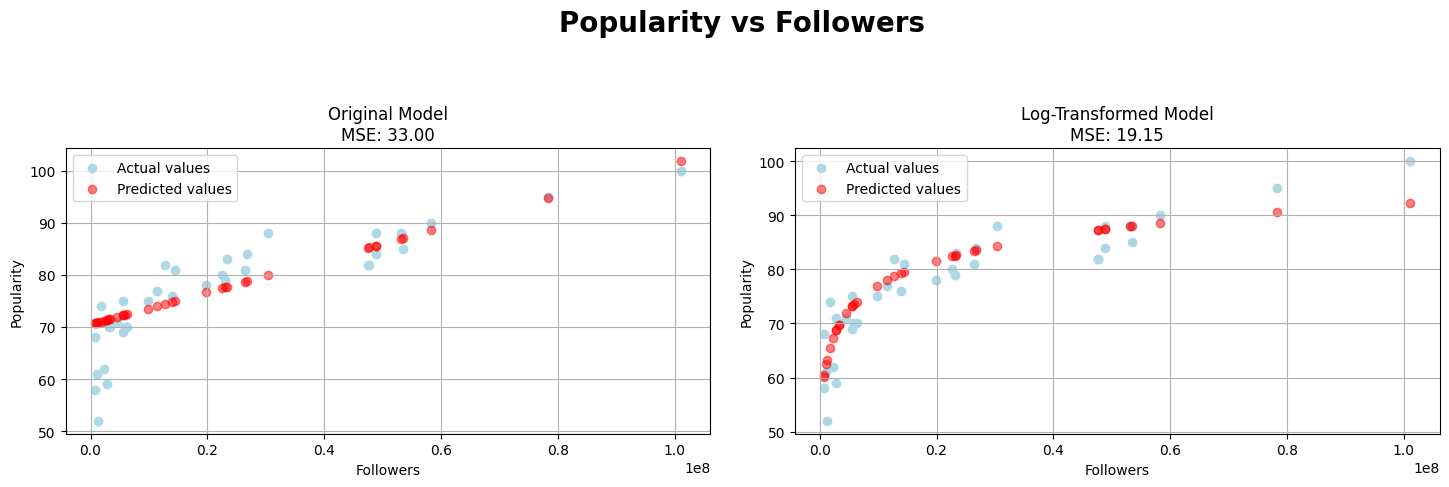

In [7]:
# week1 exercise 3.6
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset from a CSV file
df_artists = pd.read_csv('week3/df_artists.csv')

# Extract feature matrix X (followers) and target vector y (popularity)
X = df_artists[['followers']]
y = df_artists['popularity']

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model with the original data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data with the original model
y_test_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the original model
mse = mean_squared_error(y_test, y_test_pred)

# Apply log transformation to the 'followers' feature
df_artists['log_followers'] = np.log1p(df_artists['followers'])

# Extract feature matrix X (log_followers) and target vector y (popularity)
X_log = df_artists[['log_followers']]

# Split the log-transformed data into training and testing subsets
X_train_log, X_test_log, y_train, y_test = train_test_split(X_log, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model with the log-transformed data
model_log = LinearRegression()
model_log.fit(X_train_log, y_train)

# Make predictions on the test data with the log-transformed model
y_test_pred_log = model_log.predict(X_test_log)

# Calculate the Mean Squared Error (MSE) for the log-transformed model
mse_log = mean_squared_error(y_test, y_test_pred_log)

# Plot the results for comparison
fig, (ax_model, ax_log_model) = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

# Make figure text
fig.suptitle('Popularity vs Followers\n', fontsize=20, fontweight='bold')

# Add more space
fig.tight_layout(pad=3.0)

# Plot the original model
ax_model.scatter(X_test, y_test, color='lightblue', label='Actual values')
ax_model.scatter(X_test, y_test_pred, color='red', alpha=0.5, label='Predicted values')
ax_model.set_title(f'Original Model\nMSE: {mse:.2f}')
ax_model.set_xlabel('Followers')
ax_model.set_ylabel('Popularity')
ax_model.legend()
ax_model.grid(True)

# Plot the log-transformed model
ax_log_model.scatter(np.expm1(X_test_log), y_test, color='lightblue', label='Actual values')  # Reverting log transformation for visualization
ax_log_model.scatter(np.expm1(X_test_log), y_test_pred_log, color='red', alpha=0.5, label='Predicted values')
ax_log_model.set_title(f'Log-Transformed Model\nMSE: {mse_log:.2f}')
ax_log_model.set_xlabel('Followers')
ax_log_model.set_ylabel('Popularity')
ax_log_model.legend()
ax_log_model.grid(True)

plt.show()